<a href="https://colab.research.google.com/github/KashifZaman017/Face_Classification-using-CNN/blob/main/Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls  /content/drive/MyDrive/CV\Project/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!7za -y x "/content/drive/MyDrive/CVProject/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/CVProject/image/                                                 8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/CVProject/image/origin.7z.001
--
Path = /content/drive/MyDrive/CVProject/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg                                    

In [ ]:
!cp -r ./origin "/content/drive/MyDrive/CVProject"

In [3]:
label_file_path = r"/content/drive/MyDrive/CVProject/data/label/label.lst"
Images_folder_path = r"/content/drive/MyDrive/CVProject/data/image"

In [4]:
import pandas as pd
df_info = pd.read_csv(label_file_path, sep=" ", header=None)
col_names = "image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
df_info.columns = col_names
df_info

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [5]:
df_sel = df_info[df_info.face_box_cofidence > 65]
df_sel

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
5,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
9,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
11,angry_actor_16.jpg,0,158,249,521,430,66.4535,0
...,...,...,...,...,...,...,...,...
91783,afraid_woman_204.jpg,0,20,13,93,100,74.5950,6
91787,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5


In [6]:
import os
import cv2
from tqdm import tqdm_gui

all_images = []
all_labels = []
Images_folder_path = r"/content/drive/MyDrive/CVProject/origin"

for i, row in df_sel.iterrows():
    image_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]

    combined_filename = os.path.join(Images_folder_path, image_name)
    img = cv2.imread(combined_filename)

    if img is not None:
      cropped_img = img[y1:y2, x1:x2]
      print(f"Face shape: {cropped_img.shape}, x1={x1}, x2={x2}, y1={y1}, y2={y2}")
    else:
        continue

    if cropped_img is not None and not cropped_img.size == 0:
        face_resized = cv2.resize(cropped_img, (64, 64))
    else:
        continue

    all_images.append(face_resized)
    all_labels.append(label)





Face shape: (135, 135, 3), x1=450, x2=585, y1=180, y2=315
Face shape: (96, 96, 3), x1=240, x2=336, y1=128, y2=224
Face shape: (56, 56, 3), x1=71, x2=127, y1=37, y2=93
Face shape: (80, 80, 3), x1=202, x2=282, y1=289, y2=369
Face shape: (132, 132, 3), x1=431, x2=563, y1=22, y2=154
Face shape: (80, 80, 3), x1=168, x2=248, y1=962, y2=1042
Face shape: (68, 68, 3), x1=340, x2=408, y1=102, y2=170
Face shape: (191, 191, 3), x1=239, x2=430, y1=47, y2=238
Face shape: (377, 377, 3), x1=94, x2=471, y1=94, y2=471
Face shape: (57, 57, 3), x1=76, x2=133, y1=52, y2=109
Face shape: (81, 81, 3), x1=344, x2=425, y1=74, y2=155
Face shape: (135, 135, 3), x1=237, x2=372, y1=90, y2=225
Face shape: (47, 47, 3), x1=91, x2=138, y1=167, y2=214
Face shape: (325, 325, 3), x1=758, x2=1083, y1=108, y2=433
Face shape: (57, 57, 3), x1=591, x2=648, y1=681, y2=738
Face shape: (96, 96, 3), x1=32, x2=128, y1=24, y2=120
Face shape: (96, 96, 3), x1=208, x2=304, y1=88, y2=184
Face shape: (95, 95, 3), x1=1444, x2=1539, y1=654

In [7]:
print(len(all_images))
print(len(all_labels))

2676
2676


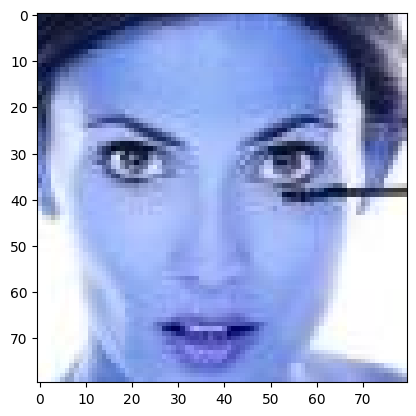

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cropped_img)

In [9]:
type(all_images)

list

In [10]:
type(all_labels)

list

In [11]:
import numpy as np
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [12]:
type(all_images)

numpy.ndarray

In [13]:
type(all_labels)

numpy.ndarray

In [14]:
if isinstance(all_images, np.ndarray) and isinstance(all_labels, np.ndarray):
    print("Images are converted to NumPy arrays.")
else:
    print("Images are not converted to NumPy arrays.")

Images are converted to NumPy arrays.


In [15]:
#X = X/255.0
all_images_normalized = all_images.astype('float32') / 255.0

# Check the shape of the array
print("Shape of all_images_normalized:", all_images_normalized.shape)

Shape of all_images_normalized: (2676, 64, 64, 3)


In [16]:
if np.min(all_images_normalized) >= 0.0 and np.max(all_images_normalized) <= 1.0:
    print("Images are properly normalized.")
else:
    print("Images are not properly normalized. Pixel value range: [", np.min(all_images_normalized), ",", np.max(all_images_normalized), "]")

Images are properly normalized.


In [17]:
#reshaping images for oversamlping
all_images_new = all_images_normalized.reshape(-1, 64*64*3)

In [18]:
# oversampling the images

from imblearn.over_sampling import SMOTE

sampler = SMOTE()

images_X_SMOTE, labels_Y_SMOTE = sampler.fit_resample(all_images_new, all_labels)

In [19]:
pd.Series(labels_Y_SMOTE).value_counts()

1    1468
6    1468
0    1468
3    1468
4    1468
5    1468
2    1468
dtype: int64

In [20]:
print(len(images_X_SMOTE))
print(len(labels_Y_SMOTE))

10276
10276


In [21]:
# again bringing images to its original shape
X = images_X_SMOTE.reshape(-1, 64, 64, 3)

In [22]:
#  label encoding, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_Y_SMOTE)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

# Check the shape of onehot_encoded
print("Shape of onehot_encoded:", onehot_encoded.shape)

Shape of onehot_encoded: (10276, 7)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
# Check the first few rows of onehot_encoded
print("First few rows of onehot_encoded:")
print(onehot_encoded[:5])

First few rows of onehot_encoded:
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


Epoch 1/100
232/232 [==============================] - 2s 8ms/step - loss: 2.1370 - accuracy: 0.2625 - val_loss: 1.6488 - val_accuracy: 0.5292
Epoch 2/100
232/232 [==============================] - 2s 7ms/step - loss: 1.5485 - accuracy: 0.5451 - val_loss: 1.1602 - val_accuracy: 0.7324
Epoch 3/100
232/232 [==============================] - 2s 8ms/step - loss: 1.2657 - accuracy: 0.6683 - val_loss: 0.9872 - val_accuracy: 0.8139
Epoch 4/100
232/232 [==============================] - 2s 7ms/step - loss: 1.1232 - accuracy: 0.7182 - val_loss: 0.8683 - val_accuracy: 0.8431
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 1.0684 - accuracy: 0.7432 - val_loss: 0.7947 - val_accuracy: 0.8686
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.9941 - accuracy: 0.7616 - val_loss: 0.7765 - val_accuracy: 0.8686
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss: 0.9621 - accuracy: 0.7670 - val_loss: 0.7116 - val_accuracy: 0.8783

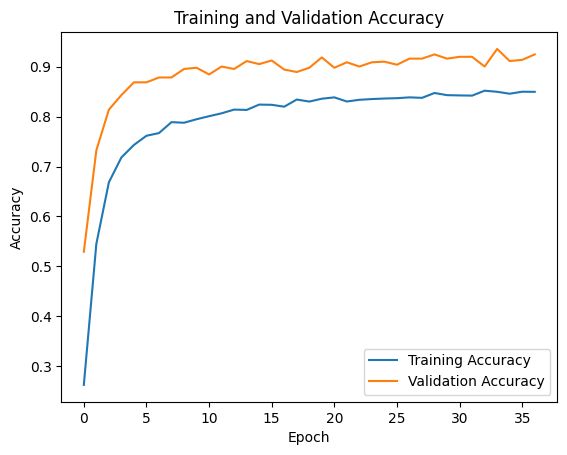

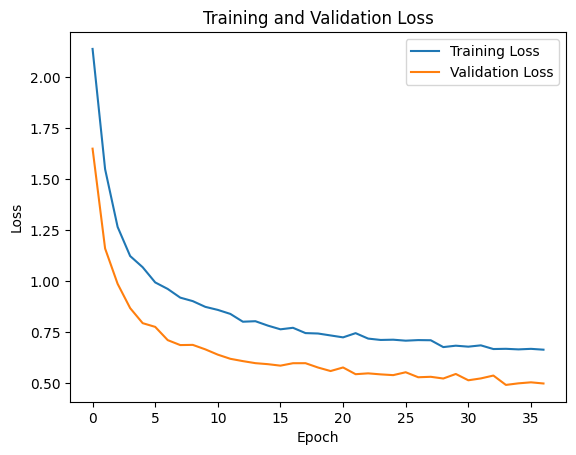

In [30]:
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

datagen.fit(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, test_size=0.2, random_state=42)

# Build the CNN model with dropout and L2 regularization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(onehot_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Plot training and validation accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

